# Unsupervised Learning: Clustering
__Interactive visualization__: http://alekseynp.com/viz/k-means.html


Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields. K-means clustering is one of the simplest and popular unsupervised machine learning algorithms

. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K

. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarit

![](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

## How K-means Works

The K-means clustering algorithm works as follows:

1. **Initialization**: Start by randomly cos__ing K ctr__oids, where K is a user-defined number of desired clusters.
2. **Assignment**: Assign each data point to the nearest centroid to get K clusters.
3. **Update**: Calculate the new centroids (mean) of the clusters.
4. **Repeat**: Repeat the assignment and update steps until the centroids do not change signifi

![](https://images.datacamp.com/image/upload/v1679392012/image4_457fd89dc8.png)entroids.


The algorithm aims to minimize the within-cluster variance, also known as __inertia__ or the __sum of squared distances (SSE)__ between data points and their corresponding centroids.

The approach K-means follows to solve the problem is called __Expectation-Maximization__. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

![](clustering-stepbystep.png)

## Applications of K-means Clustering

K-means can be used in a wide range of applications, including but not limited to:

- Market segmentation
- Document clustering
- Image segmentation
- Anomaly detection

This algorithm is particularly useful when we need to automatically discover patterns or groupings in data.


## Evaluation Methods for Clustering

Evaluating the performance of a clustering algorithm is crucial to verify its effectiveness. Common methods include:

- **Elbow Method**: Plotting the variation of the cost function (within-cluster variance) with respect to different values of K and picking the elbow point as the optimal K.
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusan example.ers.


### Elbow Curve Method
Recall that the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation or total __Within-cluster Sum of Squares (WCSS)__ / __Sum of Squared Errors (SSE)__ (or inertia) is minimized. 

**Inertia**: Sum of squared distances of samples to their closest cluster center.

The total SSE measures the __compactness of the clustering__, and we want it to be as small as possible. The __Elbow method__ runs __k-means clustering__ (kmeans number of clusters) on the dataset for a range of values of k (say 1 to 10). In the elbow method, we plot mean distance and look for the elbow point where the rate of decrease shifts. For each k, calculate the total __within-cluster sum of squares (WCSS)__. This elbow point can be used to determine K.

* Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
* Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

![](https://av-eks-blogoptimized.s3.amazonaws.com/62725cluster0.png)

At first, clusters will give a lot of information (about variance), but at some point, the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the “elbow criterion”.

### Example: Elbow method

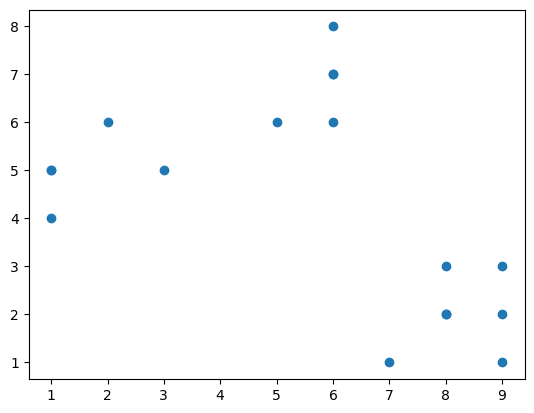

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
X2 = [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
plt.scatter(X1,X2)
plt.show()

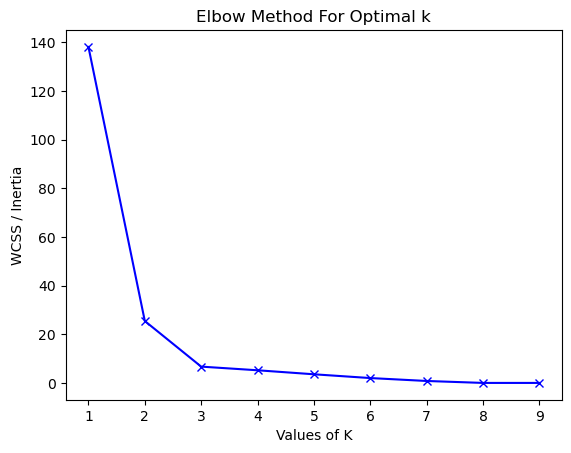

In [2]:
# Avoid Windows MKL warning
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(X1, X2)
SSE = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(K, SSE, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("WCSS / Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

The curve looks like an elbow. In the above plot, the elbow is at k=3 (i.e., the SSE falls suddenly), indicating the __optimal k__ for this dataset is __3__ (meaning 3 clusters for k-means).

### Sillhouete Analysis

The silhouette coefficient or silhouette score kmeans is a measure of how __similar__ a data point is within-cluster (cohesion) compared to other clusters (separation). The Silhouette score can be easily calculated in Python using the metrics module of the scikit-learn library._silhouette and K.

* Select a range of values of k (say 1 to 10).
* Plot Silhouette coefﬁcient for each value of K.
* The equation for calculating the silhouette coefﬁcient for a particular data point:

![](https://av-eks-blogoptimized.s3.amazonaws.com/45590cluster1.png)

* S(i) is the silhouette coefficient of the data point i.
* a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
* b(i) is the average distance from i to all clusters to which i does not belong.

![](https://av-eks-blogoptimized.s3.amazonaws.com/90733cluster2.png)
![](https://av-eks-blogoptimized.s3.amazonaws.com/56608cluster3.png)

### Example: Silhouete Analysis

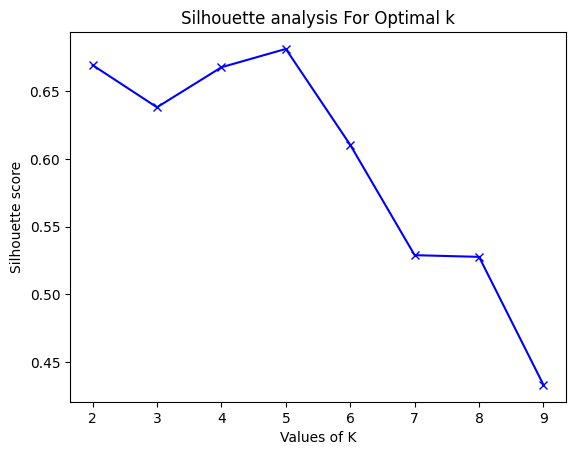

In [30]:
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.7, random_state=1)
df2 = pd.DataFrame(X)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init="auto")
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(df2, cluster_labels))

# Plotting moved outside of the loop
plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

We can see that silhuete score achieves its maximum when __k = 5__, so we pick ``n_clusters=5`` for our K-means.

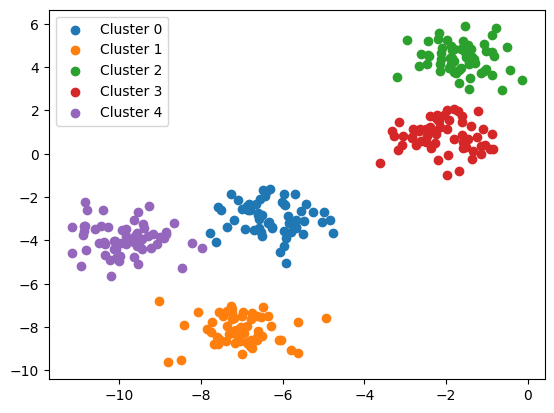

In [23]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init="auto")
kmeans.fit(X)

# Plot each cluster with a separate call to plt.scatter and assign a label
for i in range(num_clusters):
    plt.scatter(X[kmeans.labels_ == i, 0], X[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.legend()

# plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis', hue=)

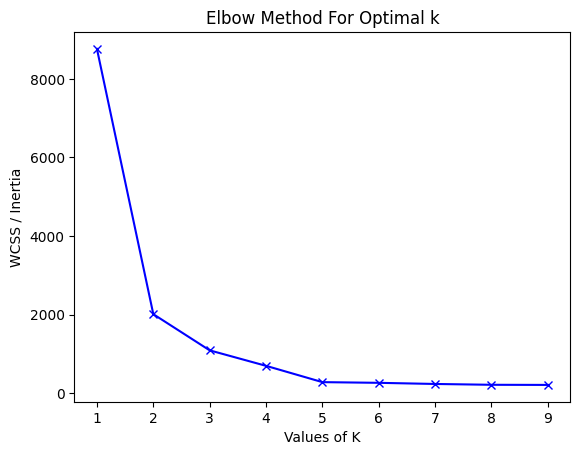

In [28]:
SSE = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(df2)
    SSE.append(kmeans.inertia_)
plt.plot(K, SSE, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("WCSS / Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [20]:
df3 = pd.DataFrame(X)
df3['cluster'] = kmeans.labels_
df3.head()

,0,1,cluster
0,-4.564533,-3.717213,1
1,-3.183701,0.841749,0
2,-7.054200,-8.708983,1
3,-1.873870,4.830774,0
4,-10.893005,-2.388485,1



__NOTE__: You can use the silhouette analysis is used in combination with the Elbow Method for a more confident decision.